In [1]:
import numpy as np
from stl import mesh

from slepian_python import *

### Load Mesh

In [2]:
# load mesh
bear_mesh = mesh.Mesh.from_file('./data/oncapintada.stl')

# f1: point1 in faces | f2: point2 in faces ...
f1 = bear_mesh.vectors[:,0,:]
f2 = bear_mesh.vectors[:,1,:]
f3 = bear_mesh.vectors[:,2,:]
nb_faces = f1.shape[0]

In [3]:
# associate index to each 3d point
coord2idx = {}
c = 0
f = np.concatenate([f1,f2,f3])
for k in range(nb_faces * 3):
    tmp = tuple(f[k])
    if tmp not in coord2idx:
        coord2idx[tmp] = c
        c += 1

vertices = np.array(list(coord2idx.keys()))
nb_nodes = np.array(list(coord2idx.values())).max() + 1

# bool array as flags
head_indexes = (vertices[:,1] < -0.4)

In [4]:
# Adjacency matrix
Adj = np.empty((nb_nodes,nb_nodes))
faces_index = []
coloring = []
for k in range(nb_faces):
    # convert to index the coordinate
    idx1 = coord2idx[tuple(f1[k])]
    idx2 = coord2idx[tuple(f2[k])]
    idx3 = coord2idx[tuple(f3[k])]

    faces_index.append([idx1,idx2,idx3])
    c = int(head_indexes[idx1] + head_indexes[idx2] + head_indexes[idx3])
    coloring.append(c)
    # populate the adjacency matrix with the edges from the face
    Adj[idx1,idx2] = 1
    Adj[idx1,idx3] = 1
    Adj[idx2,idx1] = 1
    Adj[idx2,idx3] = 1
    Adj[idx3,idx1] = 1
    Adj[idx3,idx2] = 1

### Display Nodes Selection

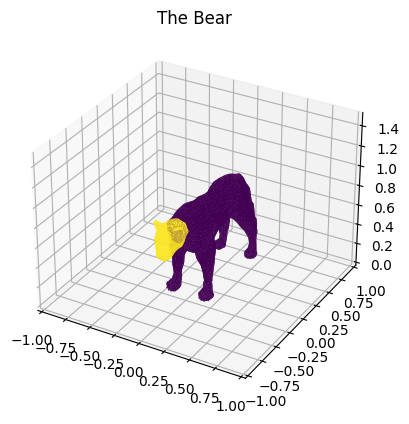

In [5]:
faces_index = np.asarray(faces_index)
coloring = np.asarray(coloring)
plot_mesh(vertices, faces_index, coloring)

### Compute Slepian Vectors and Evaluations

In [6]:
# compute laplacian
Deg = np.sum(Adj,axis=1)
Lap = laplacian(Deg,Adj)
norm_L = normalize_adjmat(Lap, Deg)

Low-graph Frequencies

In [7]:
# compute slepians
NW = 9
basis, basis_eig0, basis_conc, basis_cut = compute_slepians(norm_L, head_indexes, NW, 1, maxiter=2500)

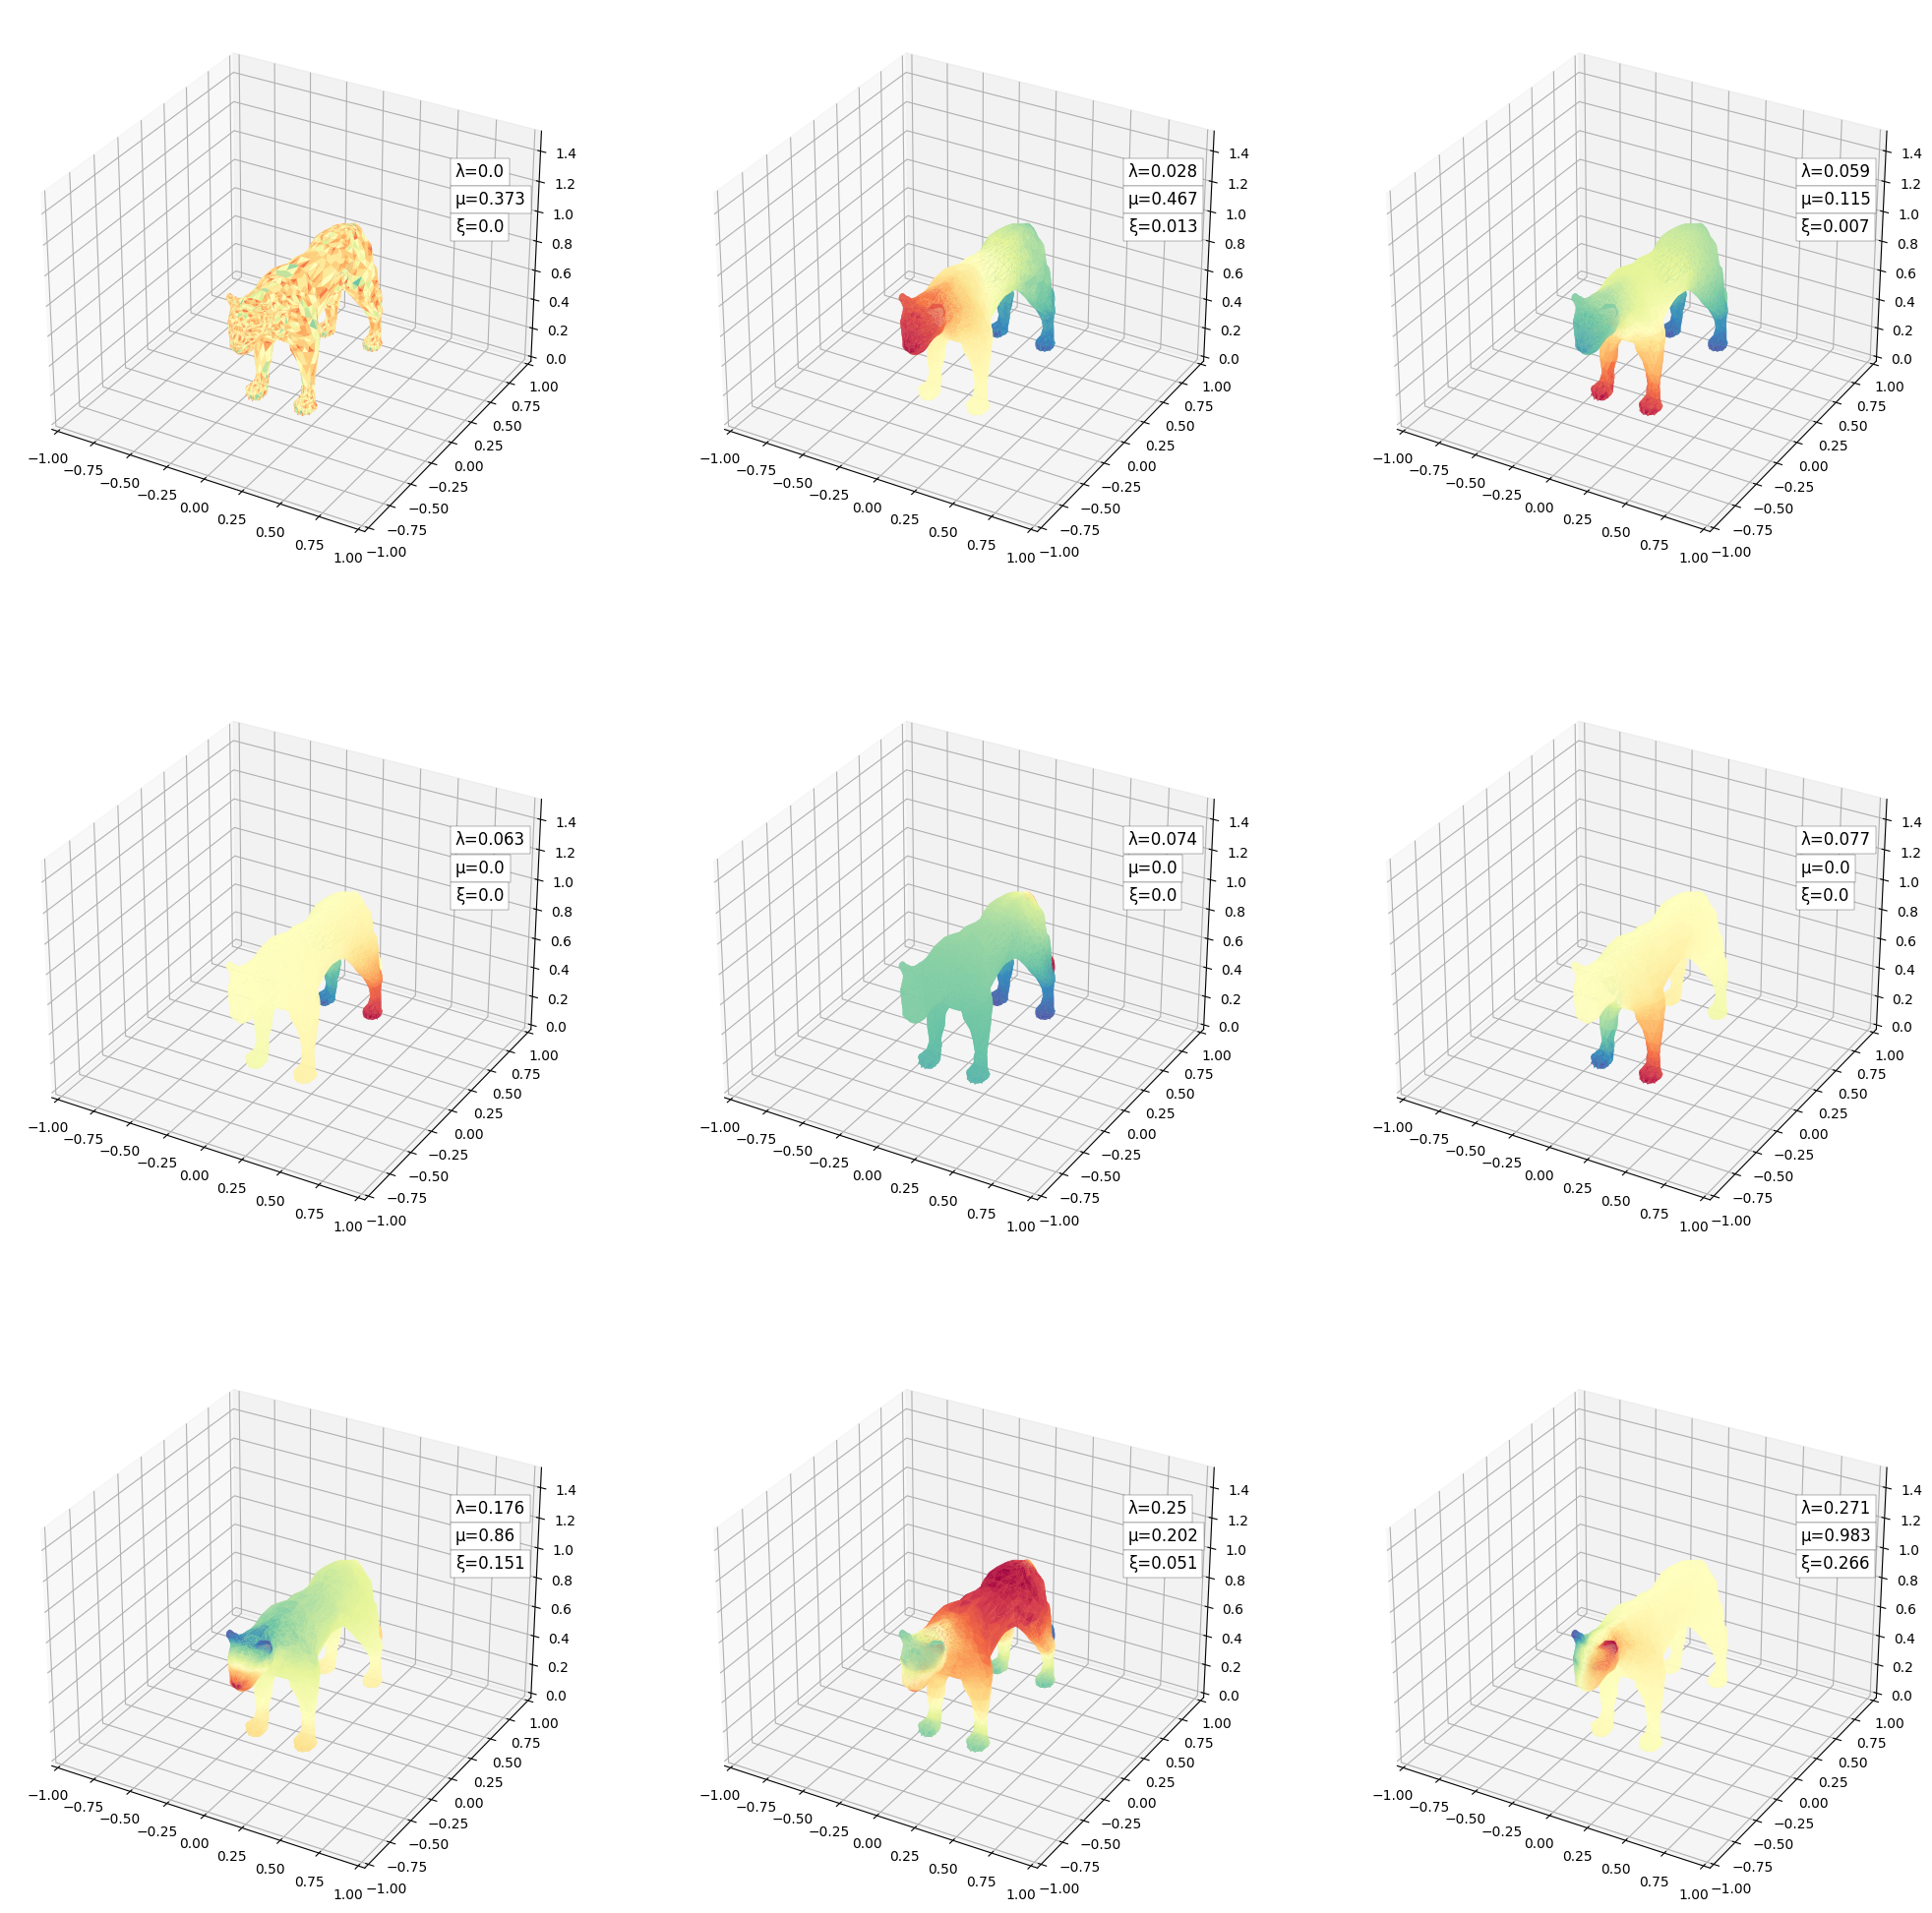

In [8]:
lbda = np.round(basis_eig0[0],3)
conc = np.round(basis_conc[0],3)
cut = np.round(basis_cut[0],3)

lowfreq_9mesh(vertices, faces_index, basis[0], [lbda, conc, cut])

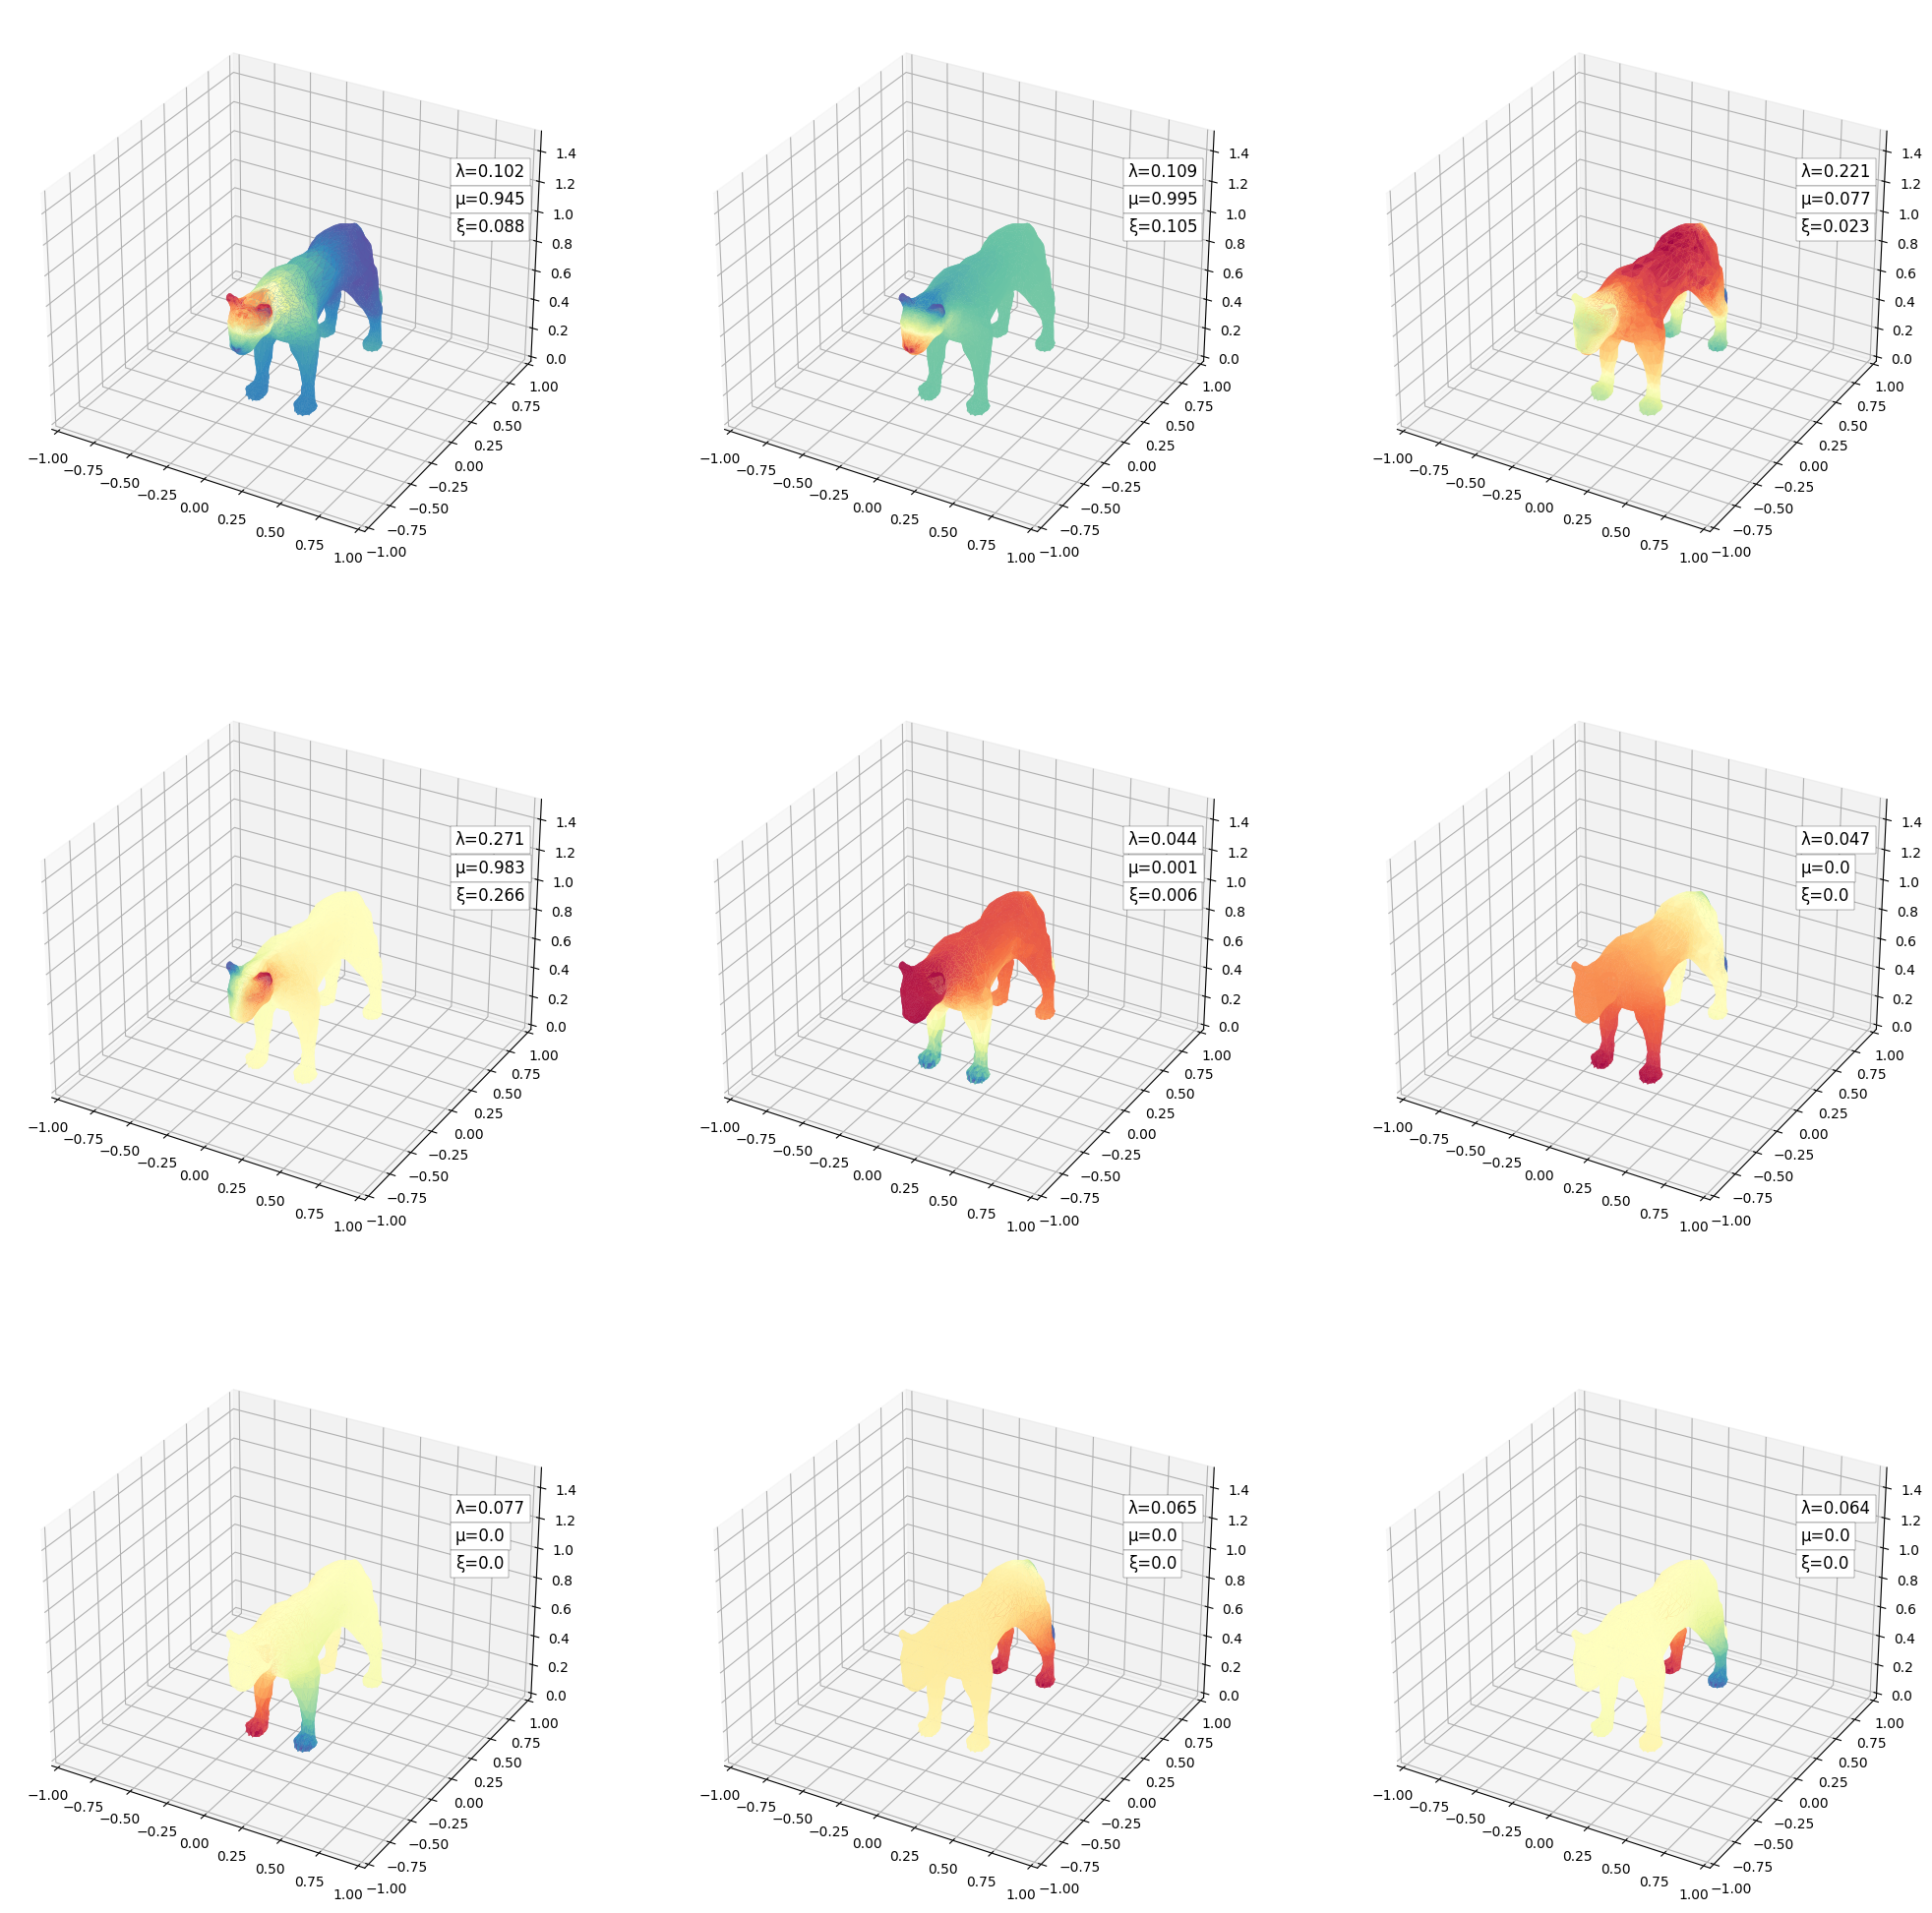

In [9]:
lbda = np.round(basis_eig0[1],3)
conc = np.round(basis_conc[1],3)
cut = np.round(basis_cut[1],3)

lowfreq_9mesh(vertices, faces_index, basis[1], [lbda, conc, cut])

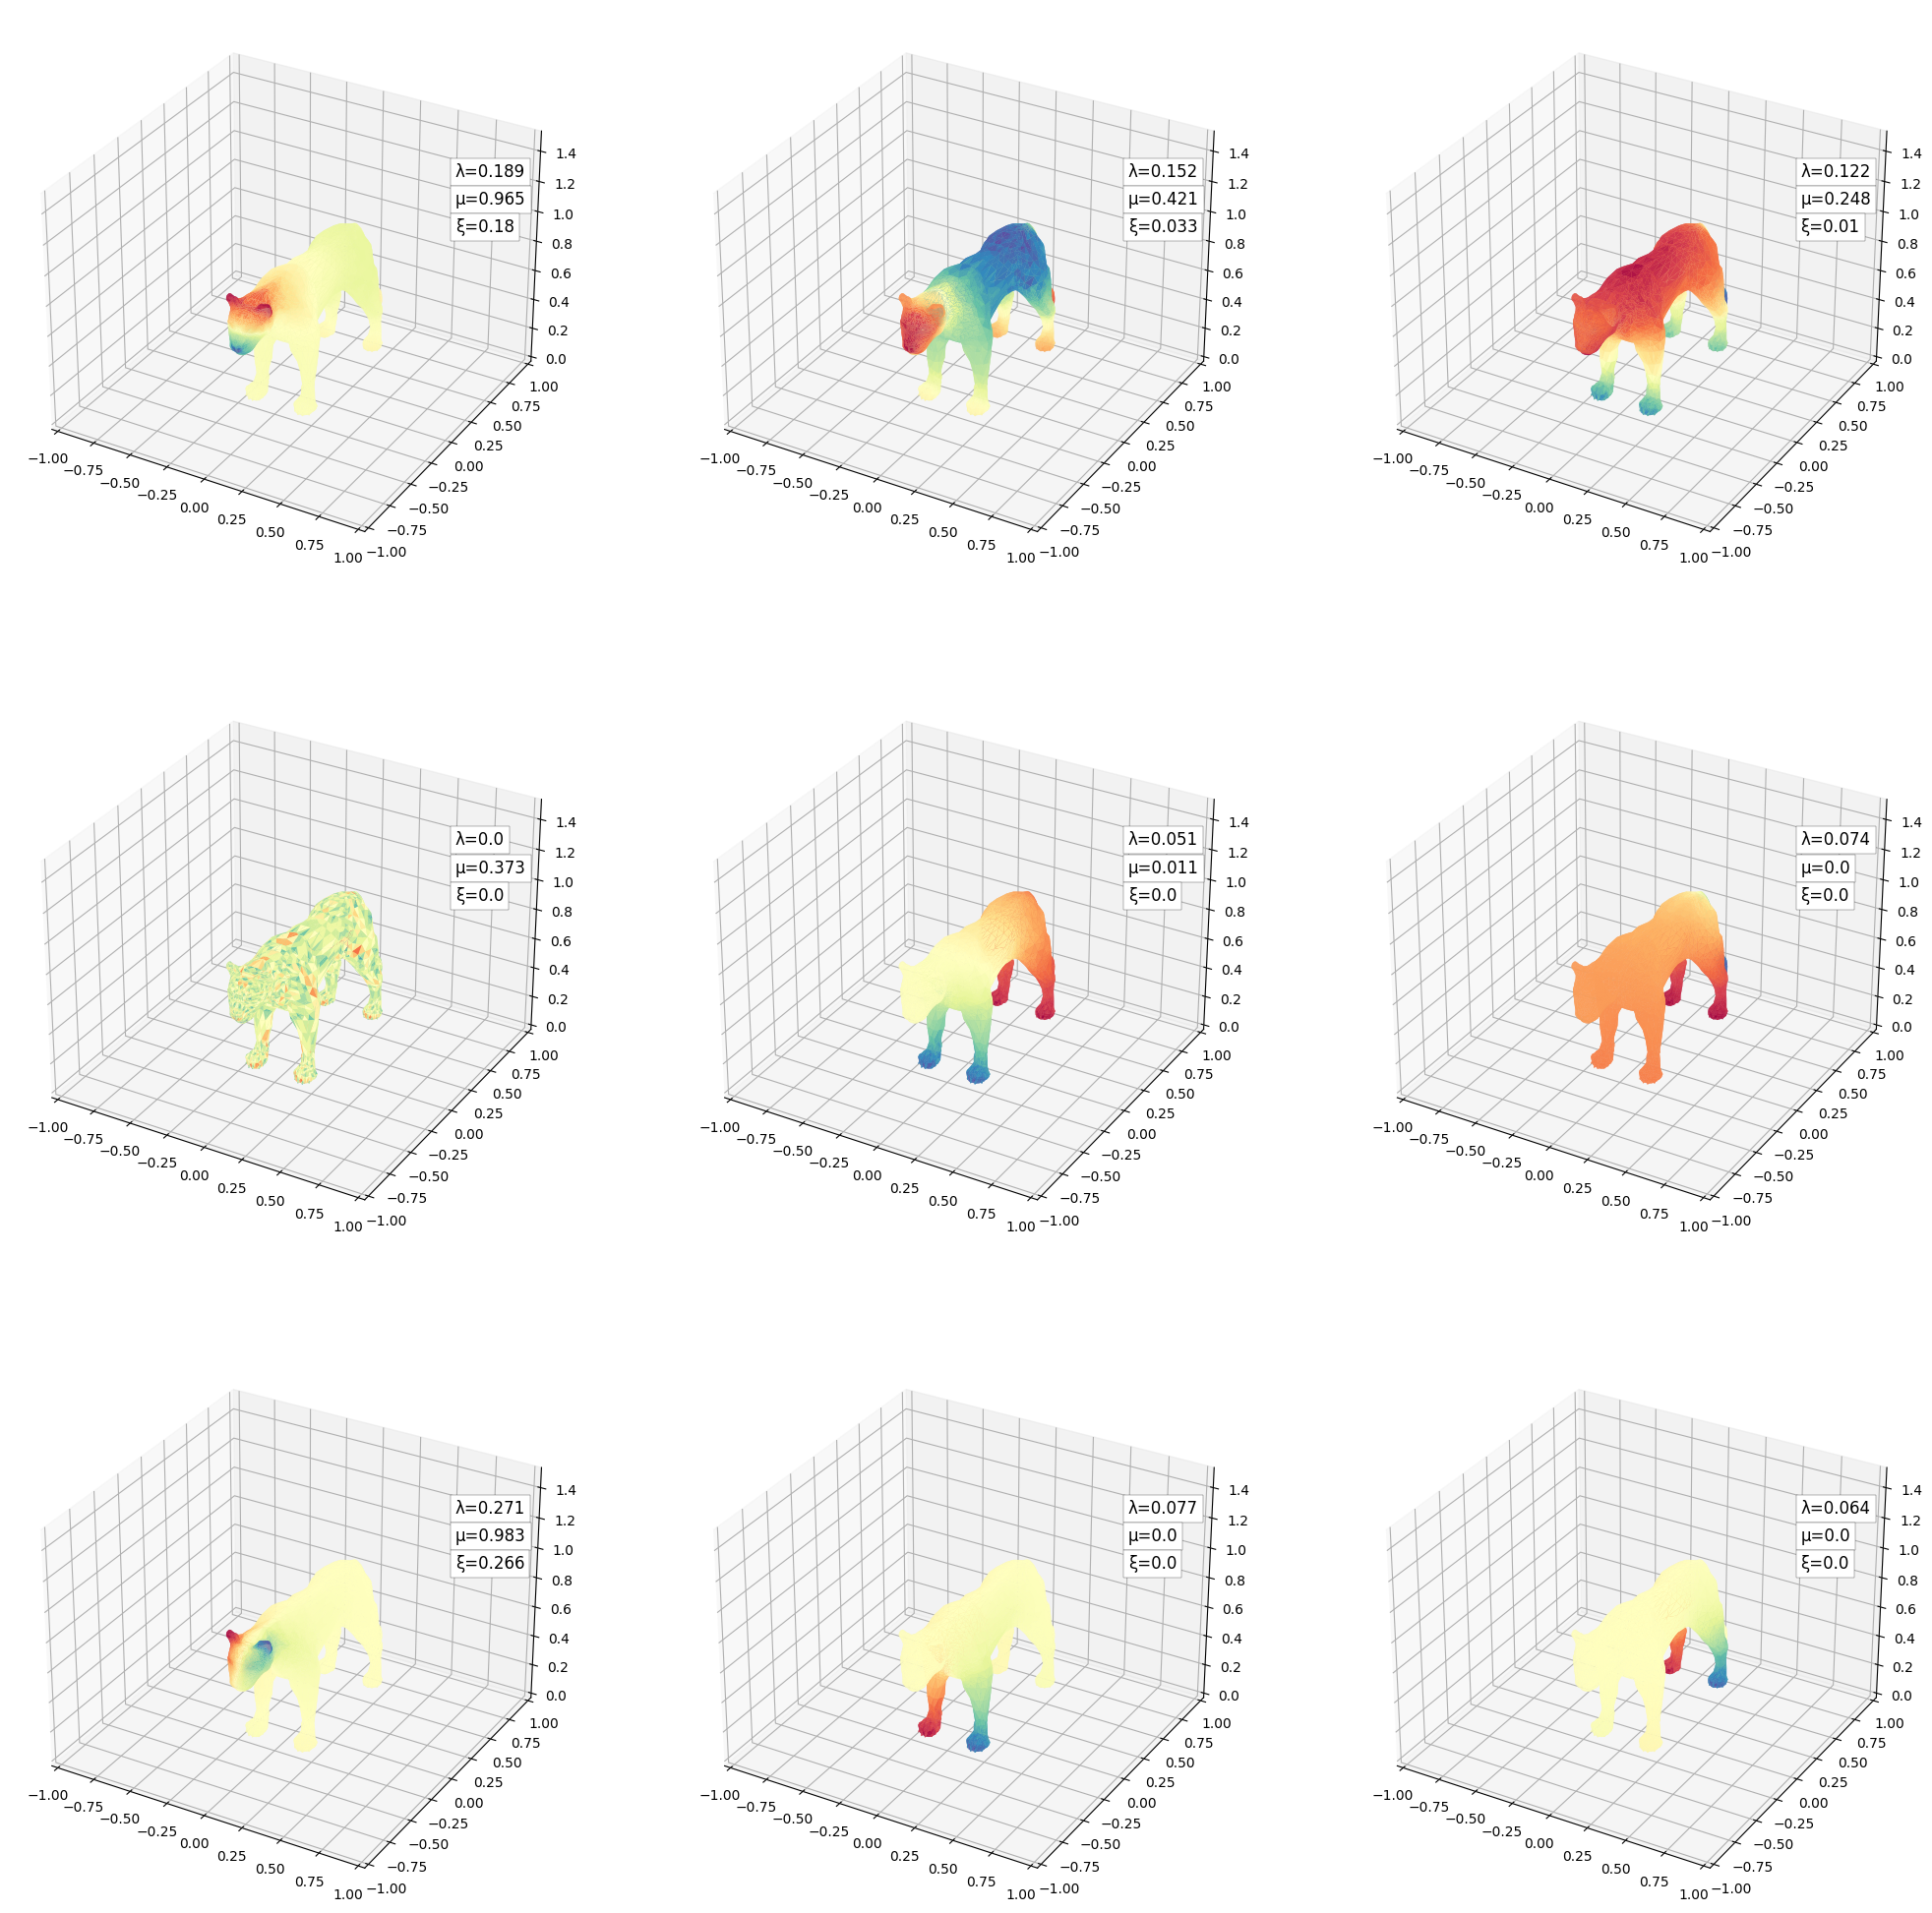

In [10]:
lbda = np.round(basis_eig0[2],3)
conc = np.round(basis_conc[2],3)
cut = np.round(basis_cut[2],3)

lowfreq_9mesh(vertices, faces_index, basis[2], [lbda, conc, cut])

High-graph Frequencies

In [15]:
def z_score(arr):
    tmp = arr - arr.min()
    z = tmp / tmp.max()
    return z

In [11]:
# compute slepians
NW = 1000
basis, basis_eig0, basis_conc, basis_cut = compute_slepians(norm_L, head_indexes, NW, 1, maxiter=2500)

Text(0.5, 1.0, 'cut')

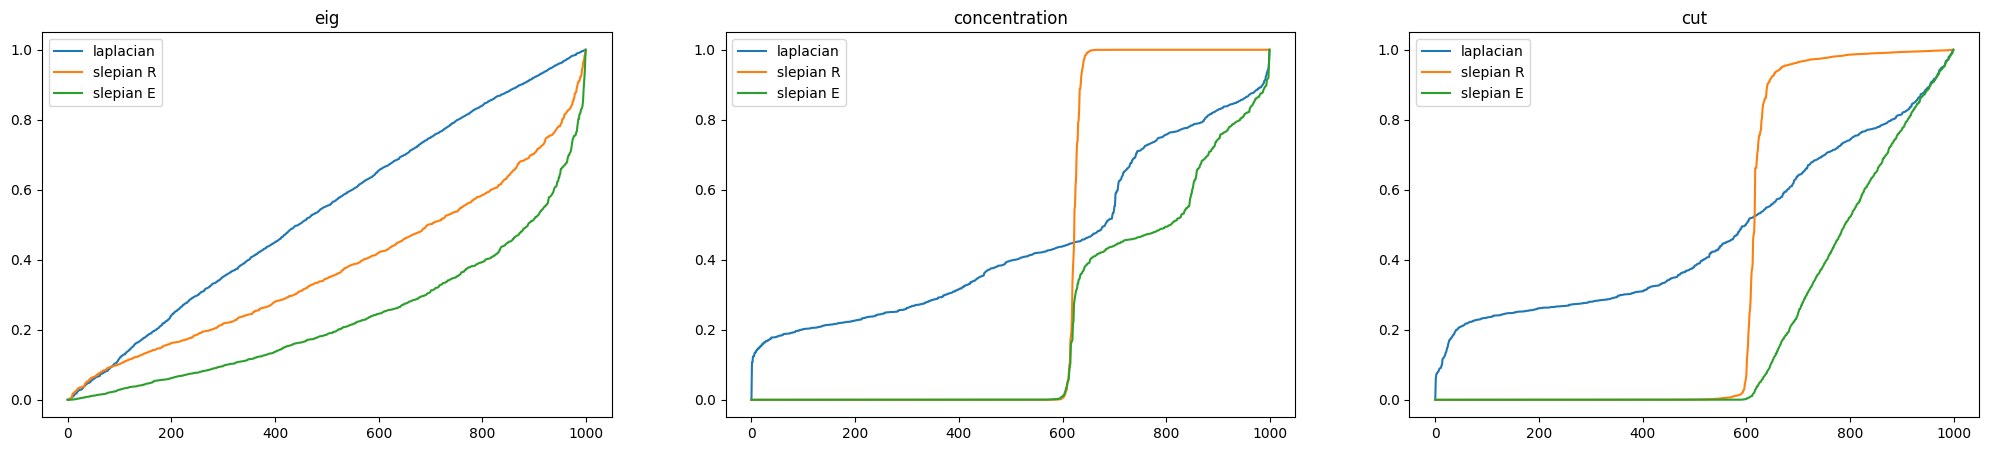

In [16]:
# eigenvalue, concentration, cut
fig, ax = plt.subplots(1,3,figsize=(25,5))
score = [basis_eig0, basis_conc, basis_cut]
for k in range(3):
    label = ["laplacian", "slepian R", "slepian E"]
    ax[0].plot(np.sort(z_score(score[k][0])), label=label[k])
    ax[1].plot(np.sort(z_score(score[k][1])), label=label[k])
    ax[2].plot(np.sort(z_score(score[k][2])), label=label[k])

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].set_title("eig")
ax[1].set_title("concentration")
ax[2].set_title("cut")